In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
df=pd.read_csv("Gujarat Data(final).csv")
df.head()

,State,District,Year,Season,Crop,Area,Production,Rainfall,temperature
0,Gujarat,AHMADABAD,1997,Kharif,Arhar/Tur,2900,2200.0,211.88,39.075
1,Gujarat,AHMADABAD,1997,Kharif,Bajra,41700,43700.0,211.88,39.075
2,Gujarat,AHMADABAD,1997,Kharif,Dry chillies,700,700.0,211.88,39.075
3,Gujarat,AHMADABAD,1997,Kharif,Groundnut,500,600.0,211.88,39.075
4,Gujarat,AHMADABAD,1997,Kharif,Jowar,42500,33500.0,211.88,39.075


In [3]:
df.replace([np.inf, -np.inf], np.nan)


,State,District,Year,Season,Crop,Area,Production,Rainfall,temperature
0,Gujarat,AHMADABAD,1997,Kharif,Arhar/Tur,2900,2200.0,211.880,39.075000
1,Gujarat,AHMADABAD,1997,Kharif,Bajra,41700,43700.0,211.880,39.075000
2,Gujarat,AHMADABAD,1997,Kharif,Dry chillies,700,700.0,211.880,39.075000
3,Gujarat,AHMADABAD,1997,Kharif,Groundnut,500,600.0,211.880,39.075000
4,Gujarat,AHMADABAD,1997,Kharif,Jowar,42500,33500.0,211.880,39.075000
...,...,...,...,...,...,...,...,...,...
8431,Gujarat,VALSAD,2012,Rabi,Gram,2000,2000.0,1.750,27.883333
8432,Gujarat,VALSAD,2012,Rabi,Other Rabi pulses,3300,2600.0,1.750,27.883333
8433,Gujarat,VALSAD,2012,Summer,Rice,600,1700.0,7.138,32.640000
8434,Gujarat,VALSAD,2012,Whole Year,Dry chillies,100,100.0,43.242,29.810000


In [4]:
df=df.dropna()
df.shape

(8365, 9)

In [5]:
df=df.drop(['State'],axis=1)
df.head()


,District,Year,Season,Crop,Area,Production,Rainfall,temperature
0,AHMADABAD,1997,Kharif,Arhar/Tur,2900,2200.0,211.88,39.075
1,AHMADABAD,1997,Kharif,Bajra,41700,43700.0,211.88,39.075
2,AHMADABAD,1997,Kharif,Dry chillies,700,700.0,211.88,39.075
3,AHMADABAD,1997,Kharif,Groundnut,500,600.0,211.88,39.075
4,AHMADABAD,1997,Kharif,Jowar,42500,33500.0,211.88,39.075


In [6]:
y=df['Production']
y.head()

0     2200.0
1    43700.0
2      700.0
3      600.0
4    33500.0
Name: Production, dtype: float64

In [7]:
df=df.drop(['Production'],axis=1)
df.head()

,District,Year,Season,Crop,Area,Rainfall,temperature
0,AHMADABAD,1997,Kharif,Arhar/Tur,2900,211.88,39.075
1,AHMADABAD,1997,Kharif,Bajra,41700,211.88,39.075
2,AHMADABAD,1997,Kharif,Dry chillies,700,211.88,39.075
3,AHMADABAD,1997,Kharif,Groundnut,500,211.88,39.075
4,AHMADABAD,1997,Kharif,Jowar,42500,211.88,39.075


In [8]:
X=df
X.head()

,District,Year,Season,Crop,Area,Rainfall,temperature
0,AHMADABAD,1997,Kharif,Arhar/Tur,2900,211.88,39.075
1,AHMADABAD,1997,Kharif,Bajra,41700,211.88,39.075
2,AHMADABAD,1997,Kharif,Dry chillies,700,211.88,39.075
3,AHMADABAD,1997,Kharif,Groundnut,500,211.88,39.075
4,AHMADABAD,1997,Kharif,Jowar,42500,211.88,39.075


In [9]:
from sklearn.preprocessing import LabelEncoder
crop_encoder=LabelEncoder()
season_encoder=LabelEncoder()
district_encoder=LabelEncoder()

In [10]:
X['Season']=season_encoder.fit_transform(X['Season'])
X['Crop']=crop_encoder.fit_transform(X['Crop'])
X['District']=crop_encoder.fit_transform(X['District'])

In [11]:
X['Year']=2020-X['Year']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [13]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()

In [14]:
clf.fit(X_train, Y_train)

RandomForestRegressor()

In [15]:
pickle.dump(clf,open('pickle_dump1.pkl','wb'))

In [16]:
from sklearn.metrics import mean_absolute_error
y_pred = clf.predict(X_test)

In [17]:
maerandom = mean_absolute_error(Y_test, y_pred)
maerandom

13618.919175298803

In [18]:
import sklearn.metrics as sn
sn.r2_score(Y_test,y_pred)

0.9695944969990626

In [19]:
X_train.head()

,District,Year,Season,Crop,Area,Rainfall,temperature
3008,9,19,0,29,3400,134.950,39.357500
3768,11,17,3,19,200,76.938,29.750000
7504,22,10,1,30,66100,21.550,27.786667
3514,10,13,3,6,19400,86.234,29.840000
361,0,8,0,24,1600,103.630,39.322500


In [20]:
x=np.array([[11,17,3,19,200,76.938,29.750000]])

y_new=clf.predict(x)
y_new

array([4163.])

In [21]:
print(y.loc[[3768]])

3768    3800.0
Name: Production, dtype: float64


In [22]:
import seaborn as sns

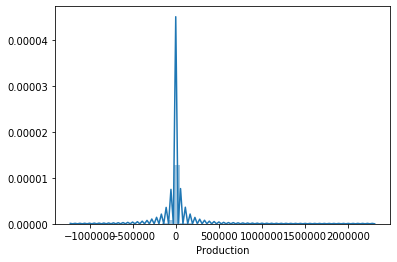

In [23]:
sns.distplot(Y_test-y_pred)

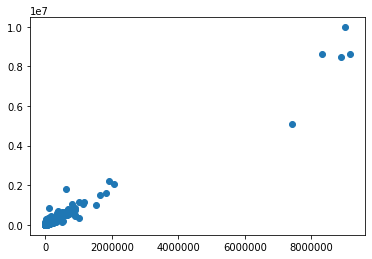

In [24]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,y_pred)

In [25]:
from sklearn import metrics

In [26]:
print('MAE:', metrics.mean_absolute_error(Y_test, y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

MAE: 13618.919175298803
MSE: 4944367382.746363
RMSE: 70316.19573573618


In [27]:
x=np.array([[11,17,3,0,200,76.938,29.750000]])

y_new=clf.predict(x)
y_new

array([10748.])

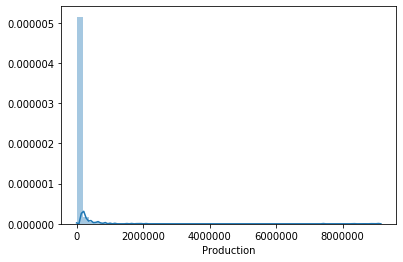

In [28]:
sns.distplot(Y_test)

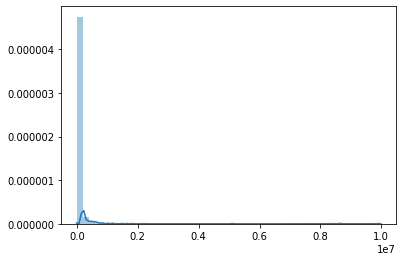

In [29]:
sns.distplot(y_pred)

In [30]:
df.corr()

,District,Year,Season,Crop,Area,Rainfall,temperature
District,1.000000,-0.025514,0.015913,0.020407,-0.025840,-0.011778,-0.017418
Year,-0.025514,1.000000,0.059185,-0.020348,0.044393,0.058030,-0.020803
Season,0.015913,0.059185,1.000000,-0.003243,-0.147490,-0.573853,-0.757524
Crop,0.020407,-0.020348,-0.003243,1.000000,-0.074487,-0.119722,-0.157327
Area,-0.025840,0.044393,-0.147490,-0.074487,1.000000,0.130388,0.142833
Rainfall,-0.011778,0.058030,-0.573853,-0.119722,0.130388,1.000000,0.830045
temperature,-0.017418,-0.020803,-0.757524,-0.157327,0.142833,0.830045,1.000000


In [31]:
final=pd.read_csv("Gujarat Data(final).csv")

In [32]:
final.corr()

,Year,Area,Production,Rainfall,temperature
Year,1.000000,-0.042335,-0.005364,-0.058454,0.019151
Area,-0.042335,1.000000,0.290813,0.129327,0.141472
Production,-0.005364,0.290813,1.000000,-0.005216,-0.051725
Rainfall,-0.058454,0.129327,-0.005216,1.000000,0.829880
temperature,0.019151,0.141472,-0.051725,0.829880,1.000000
